In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import torch
import torch.nn as nn


In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


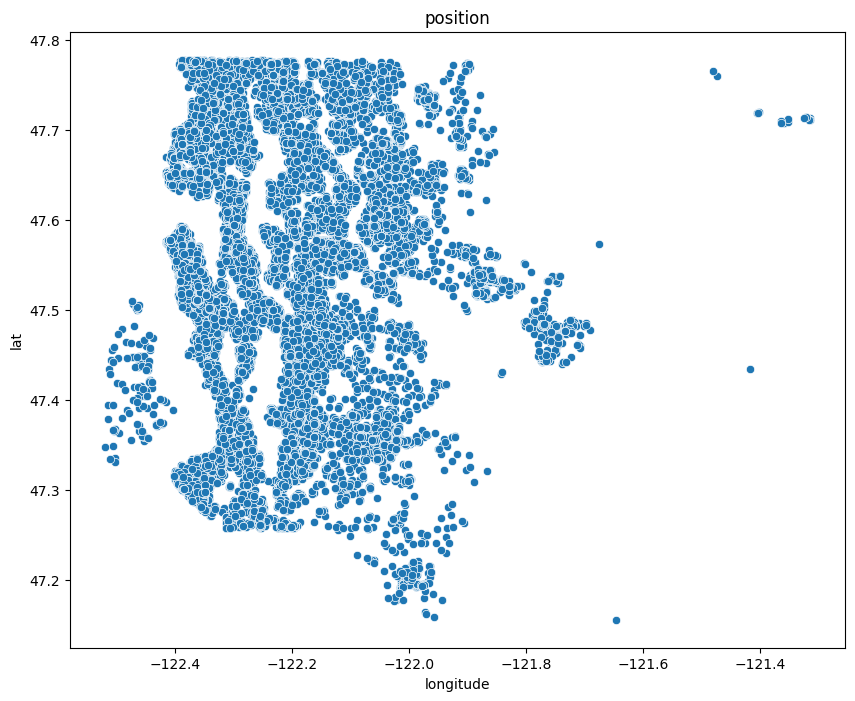

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['long'],y=df['lat'],data=df)
plt.title('position')
plt.xlabel('longitude')
plt.show()

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


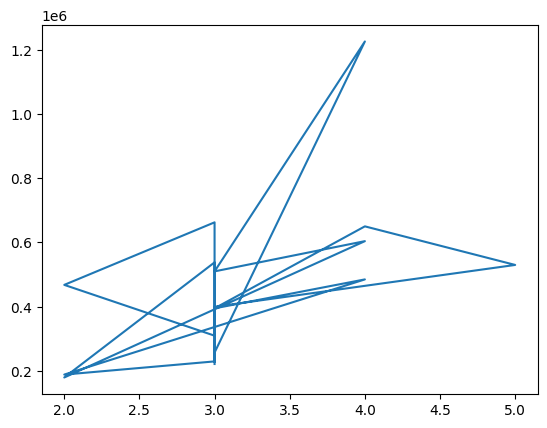

In [8]:


plt.plot(df.bedrooms[:20],df.price[:20])


In [9]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [10]:
ranges = [(0.0,0.5),(0.5,1.0),(1.0,1.5),(1.5,2.0),(2.0,2.5),(2.5,3.0),(3.0,3.5),(3.5,4.0),(4.0,4.5),(4.5,5.0),(5.0,5.5),(5.5,6.0),(6.0,6.5),(6.5,7.0),(7.0,7.5),(7.5,8.0)]
ranges

[(0.0, 0.5),
 (0.5, 1.0),
 (1.0, 1.5),
 (1.5, 2.0),
 (2.0, 2.5),
 (2.5, 3.0),
 (3.0, 3.5),
 (3.5, 4.0),
 (4.0, 4.5),
 (4.5, 5.0),
 (5.0, 5.5),
 (5.5, 6.0),
 (6.0, 6.5),
 (6.5, 7.0),
 (7.0, 7.5),
 (7.5, 8.0)]

In [11]:
df_dup = df.copy()

In [12]:
for x,y in ranges:
    df.loc[(df['bathrooms'] >= x) & (df['bathrooms'] < y),'bathrooms'] = int(y)

In [13]:
df['bathrooms'].unique()

array([1., 2., 3., 5., 4., 0., 6., 7., 8.])

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [16]:
for x,y in ranges:
    df.loc[(df['floors'] >= x) & (df['floors'] < y),'floors'] = int(y)

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


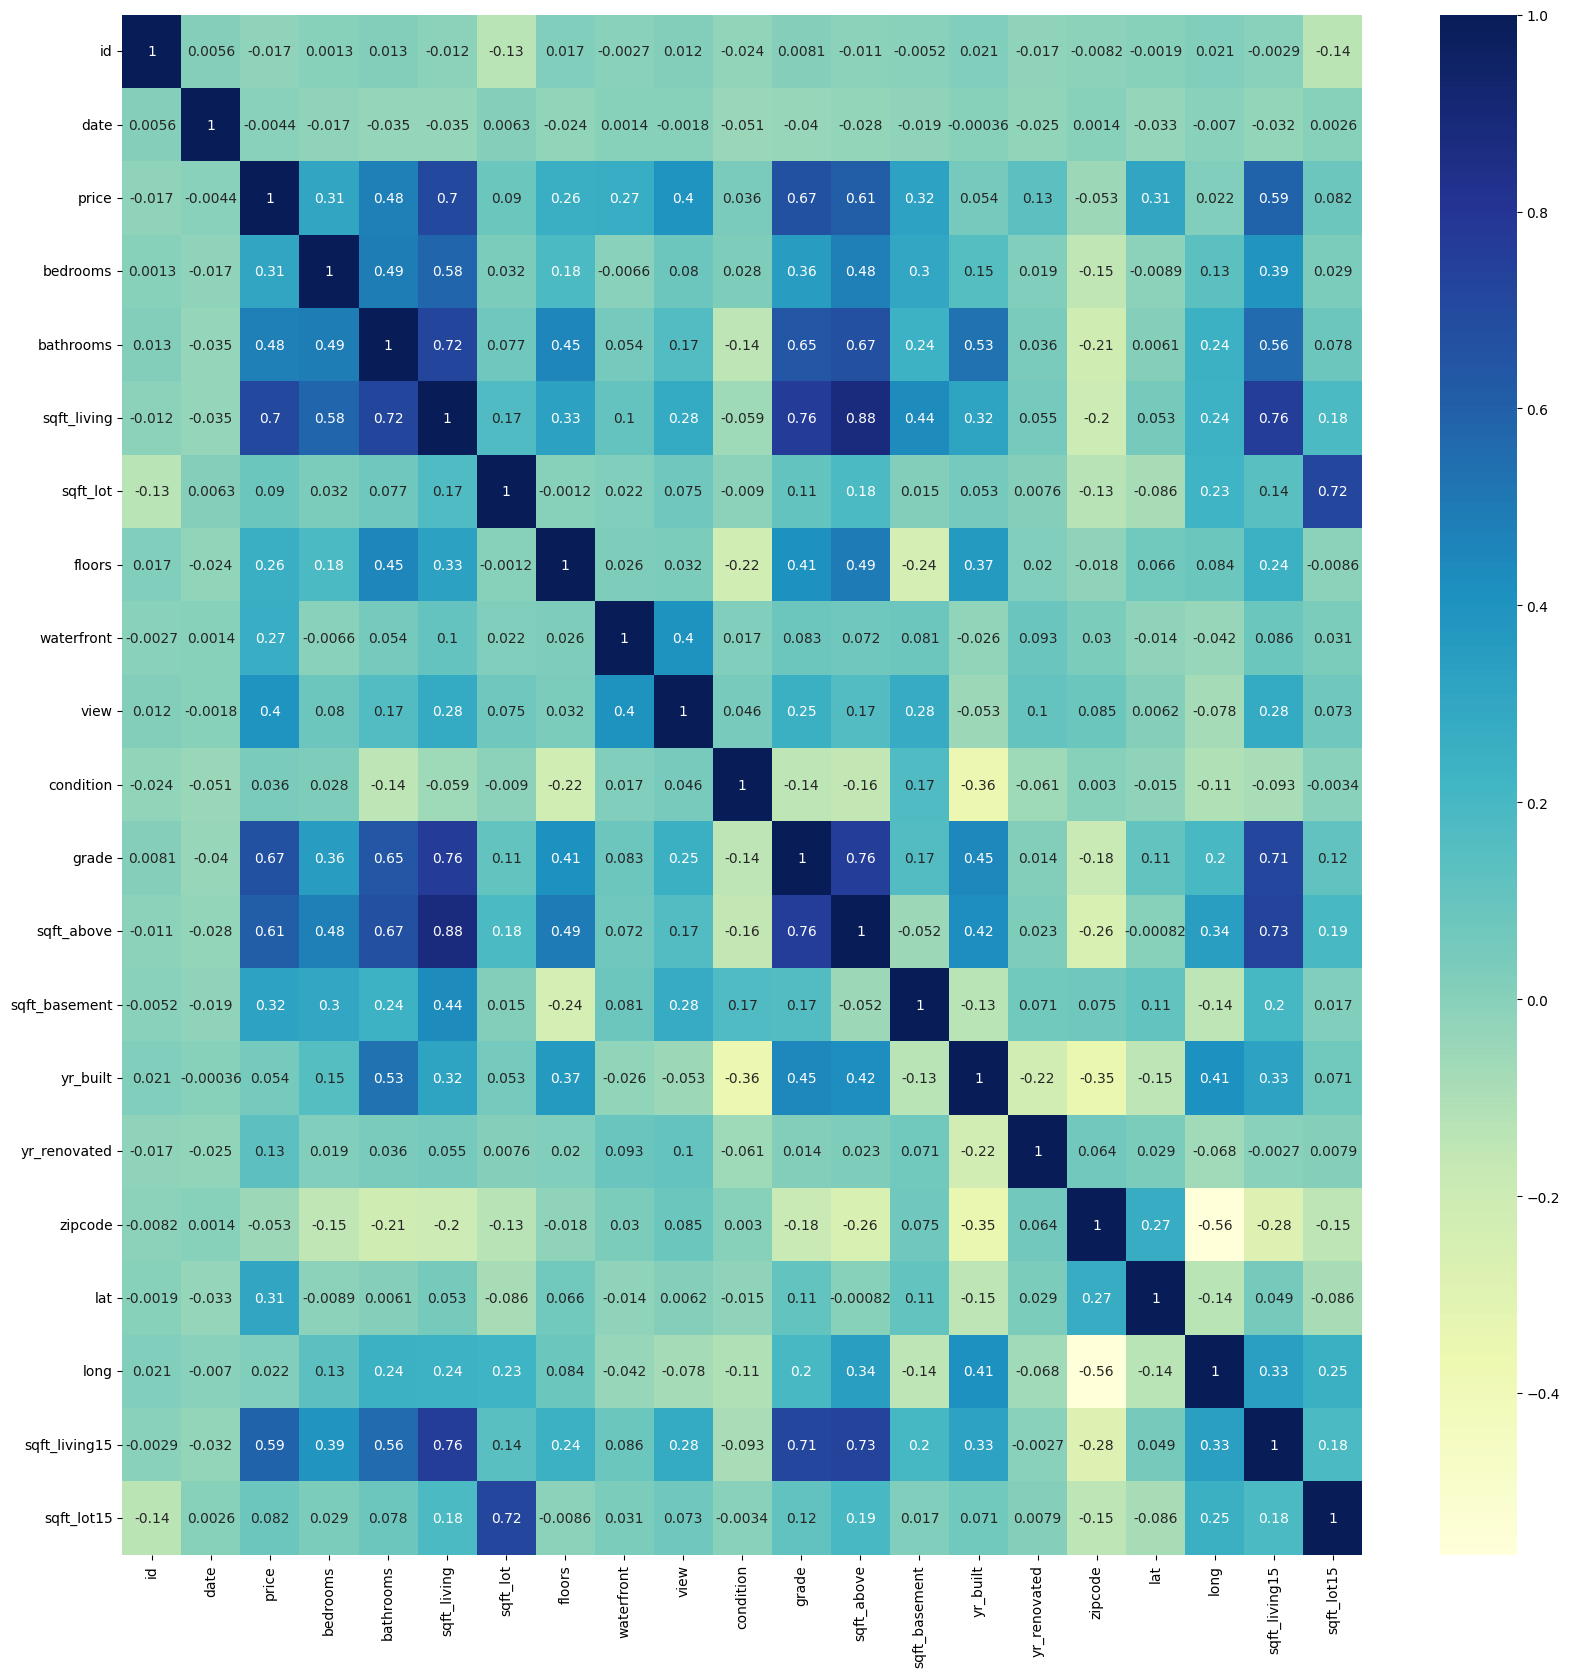

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.savefig('house.png')

In [20]:
df.drop('id',axis=1,inplace=True)

In [21]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.sort_values(by=['date','sqft_living','bedrooms'],ascending=True,inplace=True)

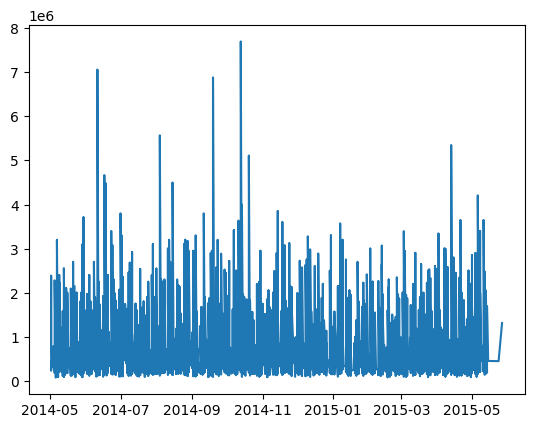

In [23]:
plt.plot(df.date,df.price)

In [24]:
df['bedrooms'].unique()

array([ 2,  3,  4,  5,  6,  7,  1,  9,  8,  0, 33, 10, 11], dtype=int64)

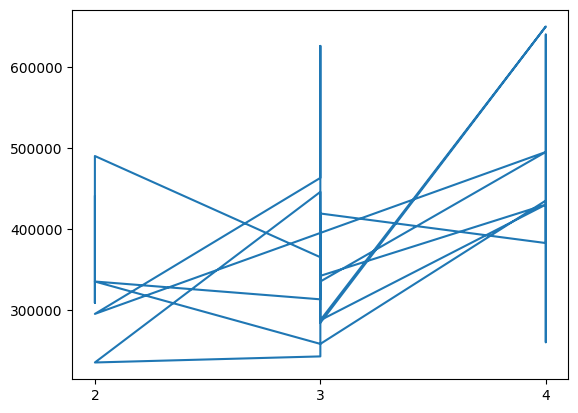

In [25]:

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
plt.plot(df.bedrooms[:30],df.price[:30])

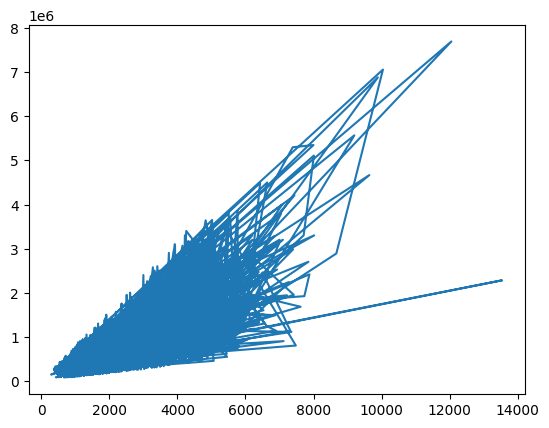

In [26]:
plt.plot(df.sqft_living,df.price)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12496,2014-05-02,440000.0,2,1.0,800,4850,1.0,0,0,4,7,800,0,1944,0,98107,47.6639,-122.364,1150,4365
15127,2014-05-02,308500.0,2,1.0,850,6174,1.0,0,0,4,7,850,0,1950,0,98155,47.7352,-122.328,1100,6174
1393,2014-05-02,490000.0,2,1.0,880,6380,1.0,0,0,3,7,880,0,1938,1994,98115,47.6924,-122.322,1340,6380
5002,2014-05-02,365000.0,3,1.0,1090,6435,1.0,0,0,4,7,1090,0,1955,0,98106,47.5334,-122.365,1340,6435
16316,2014-05-02,315000.0,3,1.0,1160,9180,1.0,0,0,3,7,1160,0,1968,0,98077,47.7427,-122.072,1160,10282


In [28]:
 df.loc[df['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2014-06-25,640000.0,33,2.0,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [29]:
df.drop(15870,inplace=True)

<Axes: >

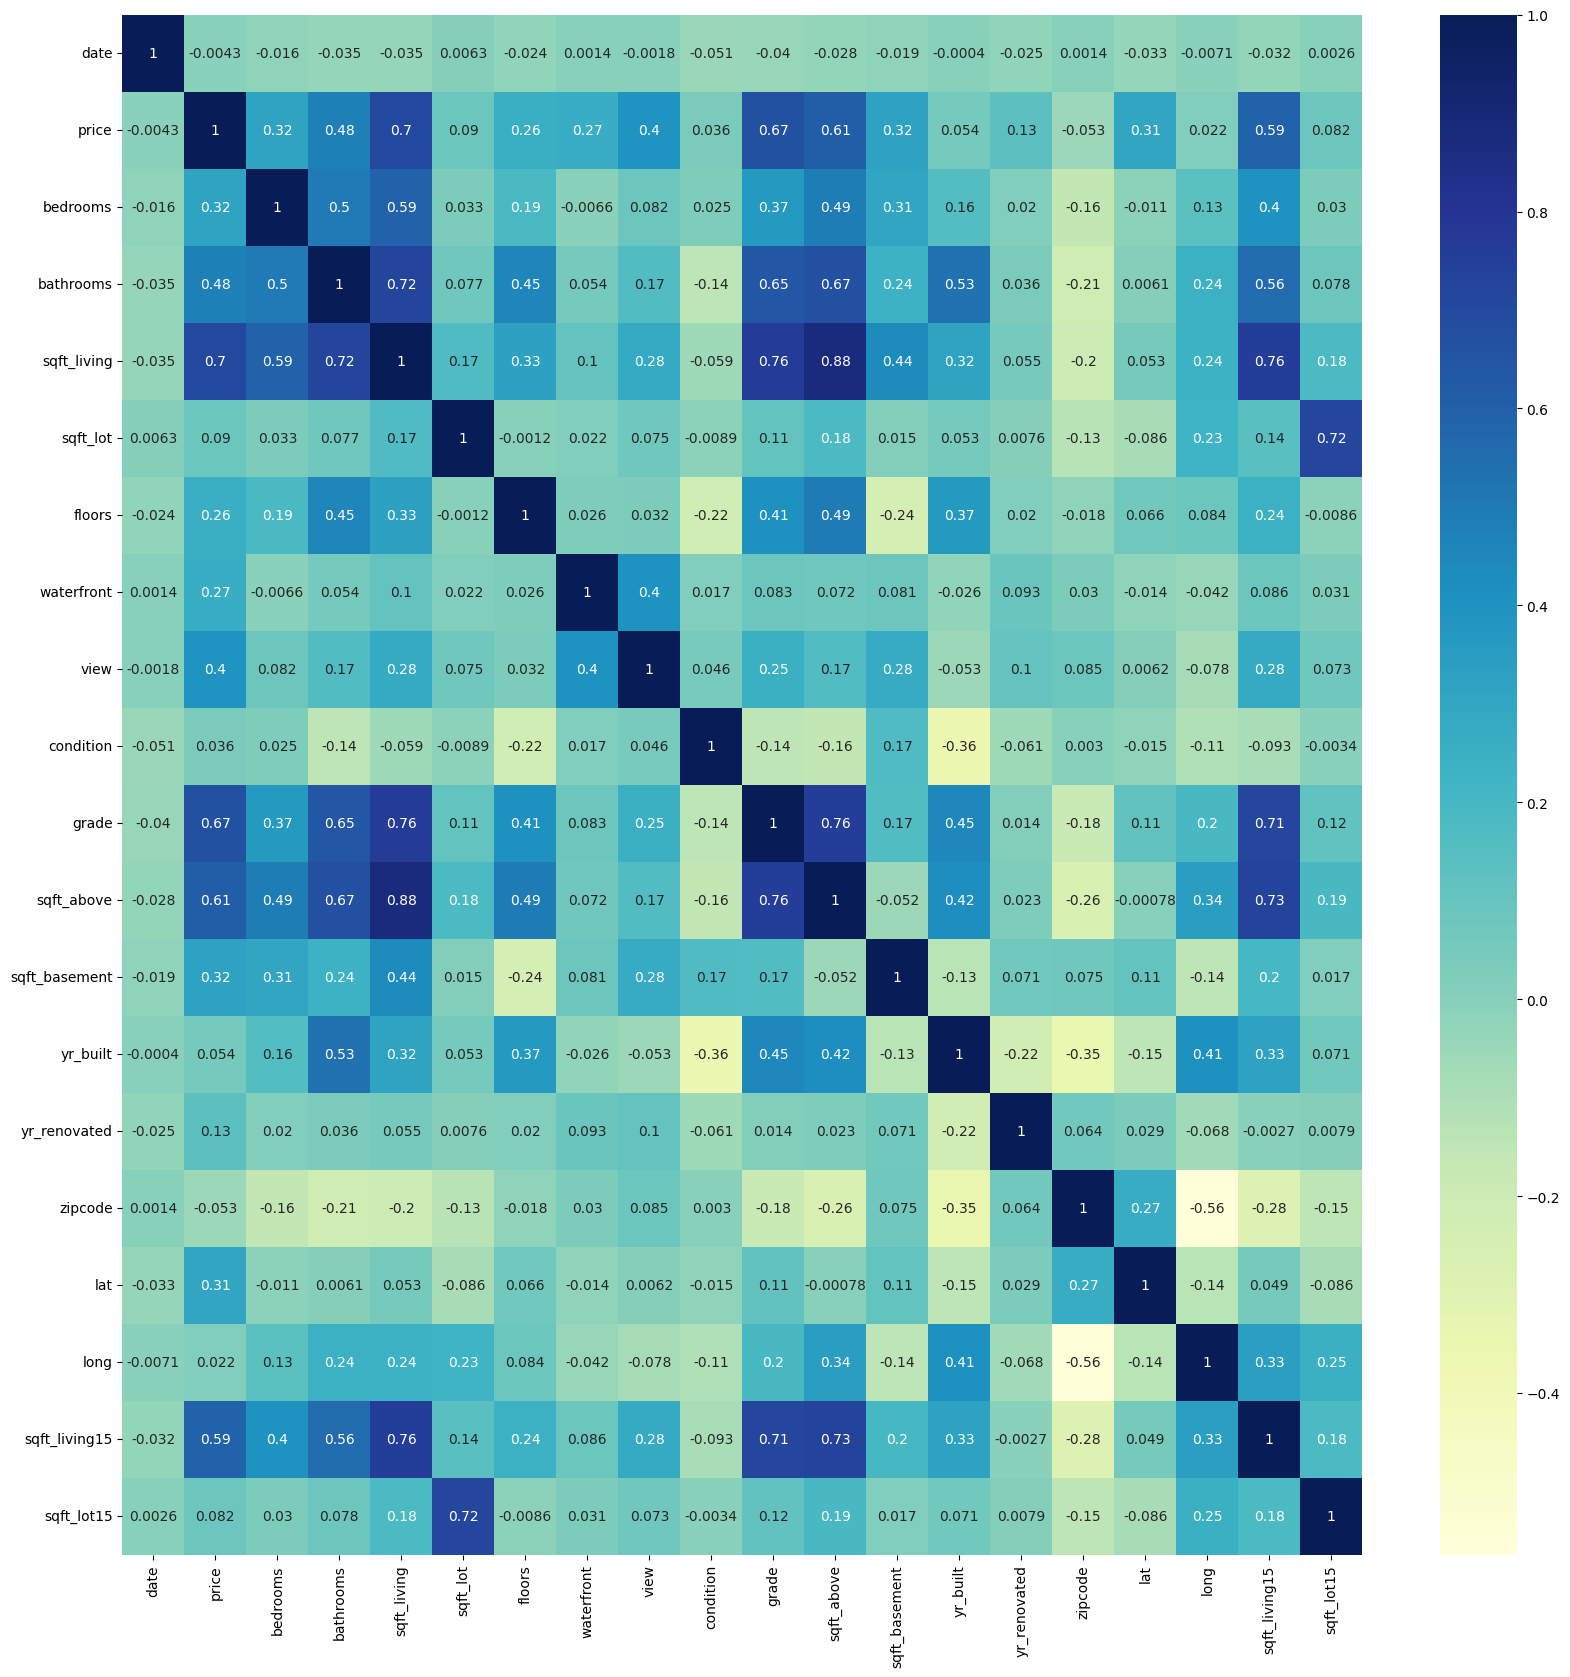

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)


In [31]:
df['sqft ratio'] = df['sqft_living'] / df['sqft_lot']

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft ratio
12496,2014-05-02,440000.0,2,1.0,800,4850,1.0,0,0,4,...,800,0,1944,0,98107,47.6639,-122.364,1150,4365,0.164948
15127,2014-05-02,308500.0,2,1.0,850,6174,1.0,0,0,4,...,850,0,1950,0,98155,47.7352,-122.328,1100,6174,0.137674
1393,2014-05-02,490000.0,2,1.0,880,6380,1.0,0,0,3,...,880,0,1938,1994,98115,47.6924,-122.322,1340,6380,0.137931
5002,2014-05-02,365000.0,3,1.0,1090,6435,1.0,0,0,4,...,1090,0,1955,0,98106,47.5334,-122.365,1340,6435,0.169386
16316,2014-05-02,315000.0,3,1.0,1160,9180,1.0,0,0,3,...,1160,0,1968,0,98077,47.7427,-122.072,1160,10282,0.126362


In [33]:
df['yr_renovated'].unique()

array([   0, 1994, 2014, 1954, 1992, 1998, 1958, 2011, 2005, 2013, 1986,
       2004, 2002, 1990, 2001, 1956, 1984, 2003, 2010, 2000, 1977, 1996,
       2007, 1981, 1970, 1983, 1975, 1971, 1988, 2009, 1999, 1997, 1969,
       1995, 2015, 1989, 1982, 2006, 1953, 1993, 1985, 1955, 1979, 1987,
       1960, 1934, 1945, 2008, 1980, 2012, 1972, 1948, 1978, 1968, 1991,
       1974, 1965, 1946, 1940, 1963, 1976, 1964, 1973, 1967, 1944, 1959,
       1957, 1962, 1951, 1950], dtype=int64)

In [34]:
df['price'].unique()

array([440000., 308500., 490000., ..., 554990., 724500., 479349.])

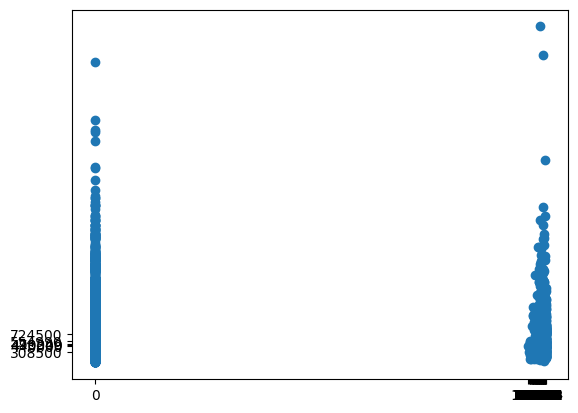

In [35]:
plt.xticks([0, 1994, 2014, 1954, 1992, 1998, 1958, 2011, 2005, 2013, 1986,
       2004, 2002, 1990, 2001, 1956, 1984, 2003, 2010, 2000, 1977, 1996,
       2007, 1981, 1970, 1983, 1975, 1971, 1988, 2009, 1999, 1997, 1969,
       1995, 2015, 1989, 1982, 2006, 1953, 1993, 1985, 1955, 1979, 1987,
       1960, 1934, 1945, 2008, 1980, 2012, 1972, 1948, 1978, 1968, 1991,
       1974, 1965, 1946, 1940, 1963, 1976, 1964, 1973, 1967, 1944, 1959,
       1957, 1962, 1951, 1950])
plt.yticks([440000., 308500., 490000, 554990., 724500., 479349.])
plt.scatter(df['yr_renovated'],df['price'])

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft ratio
12496,2014-05-02,440000.0,2,1.0,800,4850,1.0,0,0,4,...,800,0,1944,0,98107,47.6639,-122.364,1150,4365,0.164948
15127,2014-05-02,308500.0,2,1.0,850,6174,1.0,0,0,4,...,850,0,1950,0,98155,47.7352,-122.328,1100,6174,0.137674
1393,2014-05-02,490000.0,2,1.0,880,6380,1.0,0,0,3,...,880,0,1938,1994,98115,47.6924,-122.322,1340,6380,0.137931
5002,2014-05-02,365000.0,3,1.0,1090,6435,1.0,0,0,4,...,1090,0,1955,0,98106,47.5334,-122.365,1340,6435,0.169386
16316,2014-05-02,315000.0,3,1.0,1160,9180,1.0,0,0,3,...,1160,0,1968,0,98077,47.7427,-122.072,1160,10282,0.126362


In [37]:
df_dup_2 = df.copy()

In [38]:
df.loc[df['yr_renovated'] == 1992]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft ratio
12161,2014-05-05,600000.0,3,2.0,1670,39639,1.0,0,0,4,...,1670,0,1976,1992,98075,47.5929,-121.989,2330,30492,0.042130
18796,2014-05-09,536000.0,3,2.0,1300,5413,2.0,0,0,3,...,1300,0,1925,1992,98115,47.6988,-122.320,1590,6380,0.240163
15324,2014-06-24,599000.0,5,3.0,2730,22572,1.0,0,0,3,...,2080,650,1968,1992,98075,47.5951,-122.037,2260,15458,0.120946
5669,2014-06-24,1157400.0,3,3.0,2740,5925,2.0,0,2,3,...,2740,0,1913,1992,98112,47.6313,-122.303,2740,5948,0.462447
5000,2014-07-02,519000.0,5,2.0,2570,13054,1.0,0,1,3,...,1470,1100,1950,1992,98166,47.4487,-122.352,2570,19807,0.196875
18511,2014-07-31,1650000.0,4,3.0,3190,14904,1.0,0,3,4,...,1940,1250,1949,1992,98004,47.6178,-122.214,2600,11195,0.214037
12392,2014-08-13,335000.0,2,2.0,1660,11437,2.0,0,0,3,...,1660,0,1958,1992,98146,47.4899,-122.339,1290,7860,0.145143
3550,2014-10-18,1008000.0,3,3.0,2240,41339,1.0,0,0,4,...,2240,0,1945,1992,98005,47.6483,-122.163,2900,45738,0.054186
12807,2014-10-24,538000.0,2,2.0,1850,3060,1.0,0,0,3,...,1060,790,1929,1992,98115,47.6821,-122.308,1850,4080,0.604575
1373,2014-10-28,830000.0,5,3.0,2920,2808,2.0,0,0,3,...,2140,780,1960,1992,98103,47.6540,-122.342,1620,1544,1.039886


In [39]:
df.drop(['date','zipcode','lat','long'],axis=1,inplace=True)

In [40]:
df['sqft ratio15'] = df['sqft_living15'] / df['sqft_lot15']

In [41]:
df.drop(['sqft_living15','sqft_lot15','sqft ratio15'],axis=1,inplace=True)

In [42]:
df['renovated_age'] = 2014 - df['yr_renovated']

In [43]:
df['age'] = 2014 - df['yr_built']

In [44]:
df.duplicated()

12496    False
15127    False
1393     False
5002     False
16316    False
         ...  
20472    False
6197     False
5637     False
13053    False
16594    False
Length: 21612, dtype: bool

In [45]:
columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_renovated','sqft ratio','age']
columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'sqft ratio',
 'age']

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft ratio,renovated_age,age
12496,440000.0,2,1.0,800,4850,1.0,0,0,4,7,800,0,1944,0,0.164948,2014,70
15127,308500.0,2,1.0,850,6174,1.0,0,0,4,7,850,0,1950,0,0.137674,2014,64
1393,490000.0,2,1.0,880,6380,1.0,0,0,3,7,880,0,1938,1994,0.137931,20,76
5002,365000.0,3,1.0,1090,6435,1.0,0,0,4,7,1090,0,1955,0,0.169386,2014,59
16316,315000.0,3,1.0,1160,9180,1.0,0,0,3,7,1160,0,1968,0,0.126362,2014,46


<Axes: >

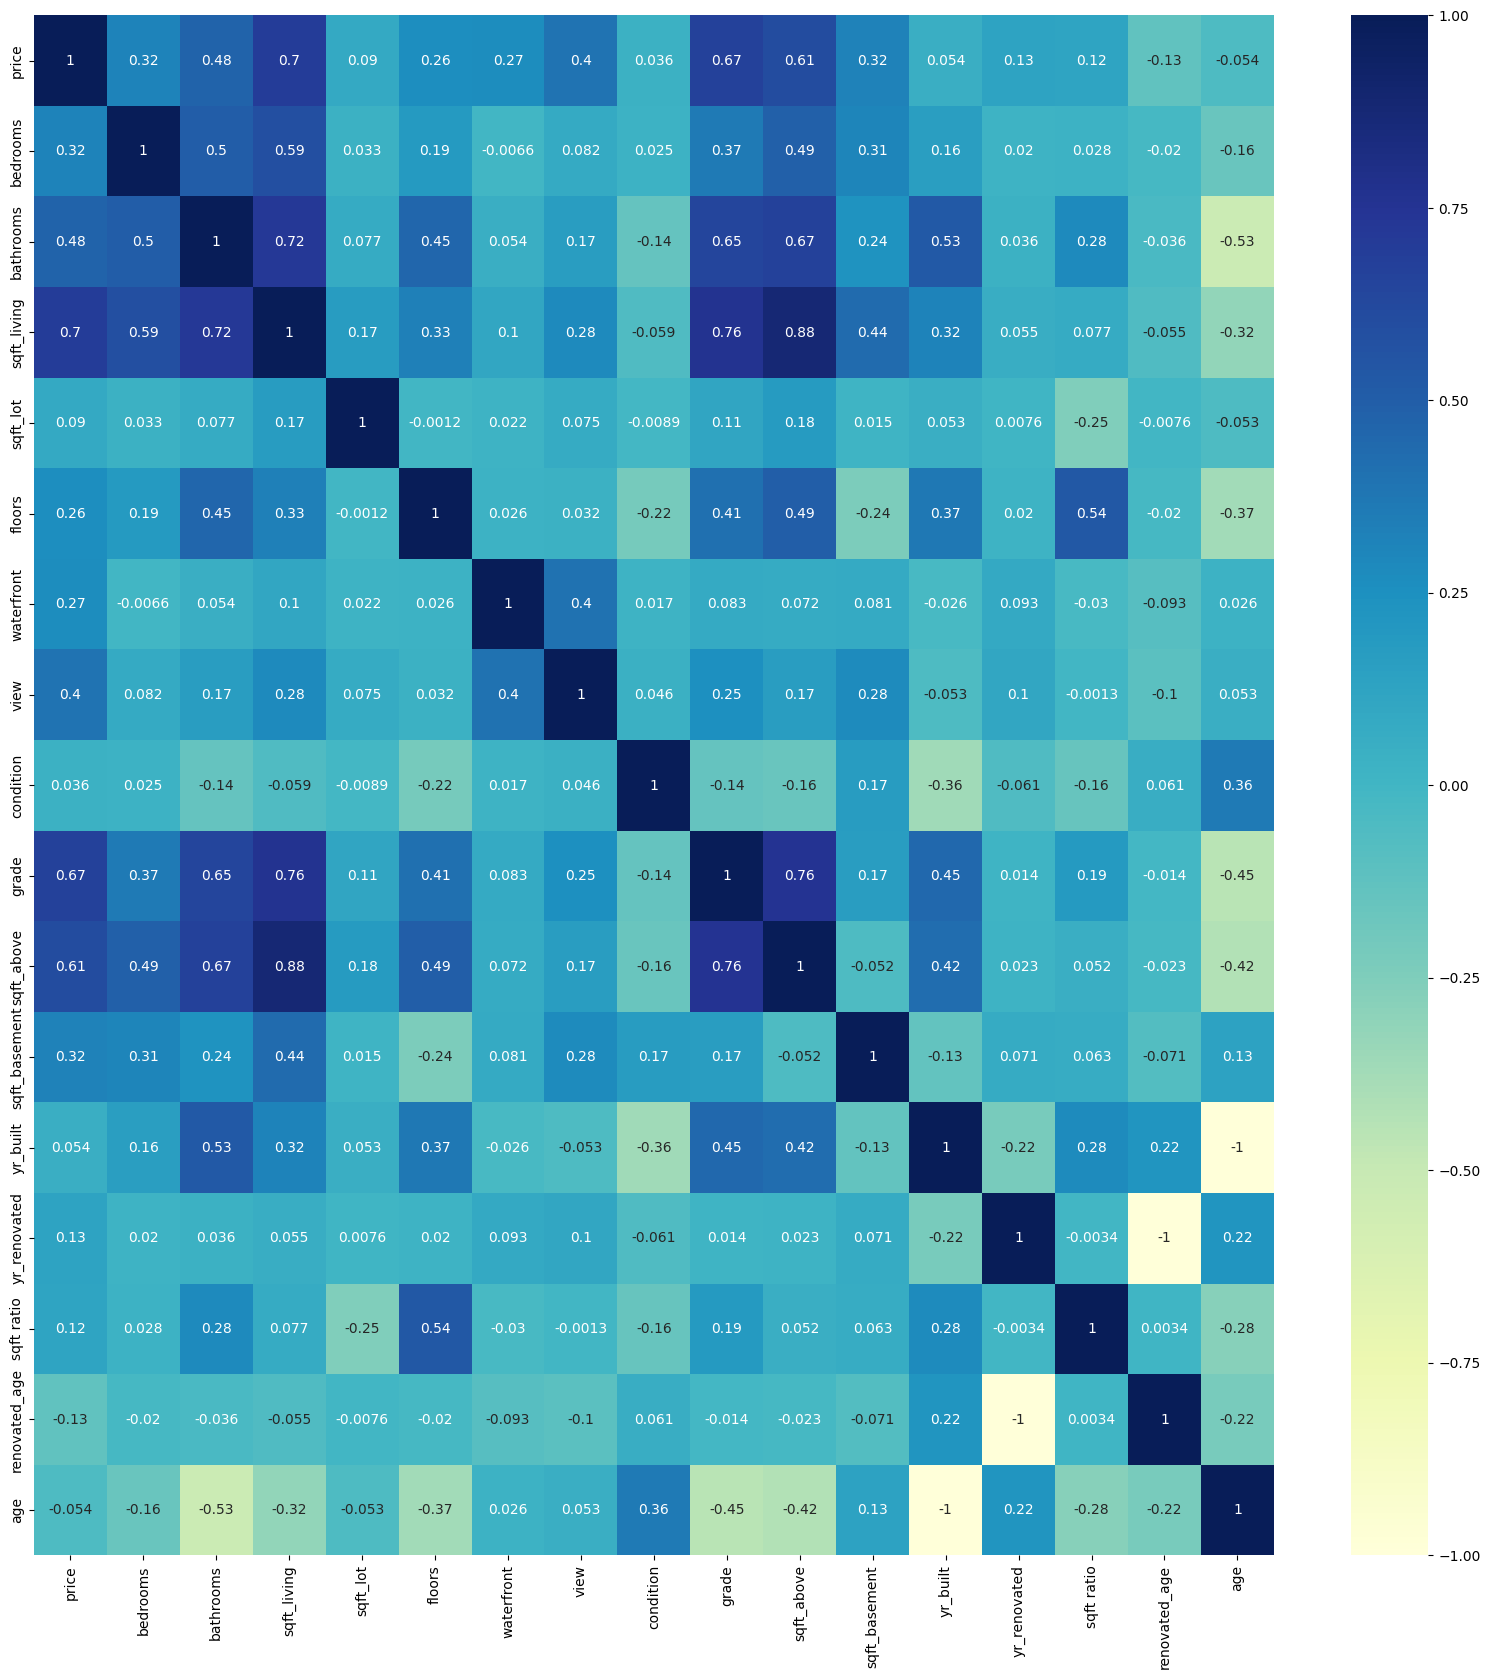

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

In [48]:
df.drop('renovated_age',axis=1,inplace=True)

In [49]:
df['yr_built'].unique()

array([1944, 1950, 1938, 1955, 1968, 1983, 1965, 1949, 2001, 2008, 1976,
       1987, 1954, 1974, 1945, 1967, 1956, 1978, 1959, 2009, 1948, 2005,
       1990, 2007, 1992, 1966, 1996, 1957, 1977, 1963, 1920, 1923, 1980,
       1985, 2006, 1951, 2013, 1929, 1989, 2000, 1991, 2014, 1979, 2004,
       1939, 1909, 1997, 1995, 2012, 1921, 1973, 1986, 1988, 1900, 1969,
       1962, 1908, 1958, 1971, 1928, 1961, 1953, 1924, 1930, 2010, 1942,
       1994, 1984, 1960, 1975, 1902, 1982, 1998, 2003, 1999, 1952, 1912,
       1903, 1947, 1905, 1940, 1926, 1916, 1964, 1970, 1913, 1943, 1906,
       1981, 1904, 1910, 1993, 1917, 2002, 1946, 2011, 1937, 1922, 1914,
       1925, 1918, 1972, 1941, 1932, 1911, 1919, 1936, 1931, 1927, 1901,
       1907, 1915, 2015, 1935, 1933, 1934], dtype=int64)

In [50]:
df.loc[df['yr_built'] < 2000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft ratio,age
12496,440000.0,2,1.0,800,4850,1.0,0,0,4,7,800,0,1944,0,0.164948,70
15127,308500.0,2,1.0,850,6174,1.0,0,0,4,7,850,0,1950,0,0.137674,64
1393,490000.0,2,1.0,880,6380,1.0,0,0,3,7,880,0,1938,1994,0.137931,76
5002,365000.0,3,1.0,1090,6435,1.0,0,0,4,7,1090,0,1955,0,0.169386,59
16316,315000.0,3,1.0,1160,9180,1.0,0,0,3,7,1160,0,1968,0,0.126362,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19396,725000.0,4,2.0,1980,5850,1.0,0,1,4,8,1380,600,1960,0,0.338462,54
11560,360000.0,4,3.0,2020,7289,2.0,0,0,3,7,2020,0,1994,0,0.277130,20
5637,450000.0,5,2.0,1870,7344,2.0,0,0,3,7,1870,0,1960,0,0.254630,54
13053,445500.0,2,2.0,1390,6670,1.0,0,0,3,6,720,670,1941,0,0.208396,73


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'sqft ratio'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

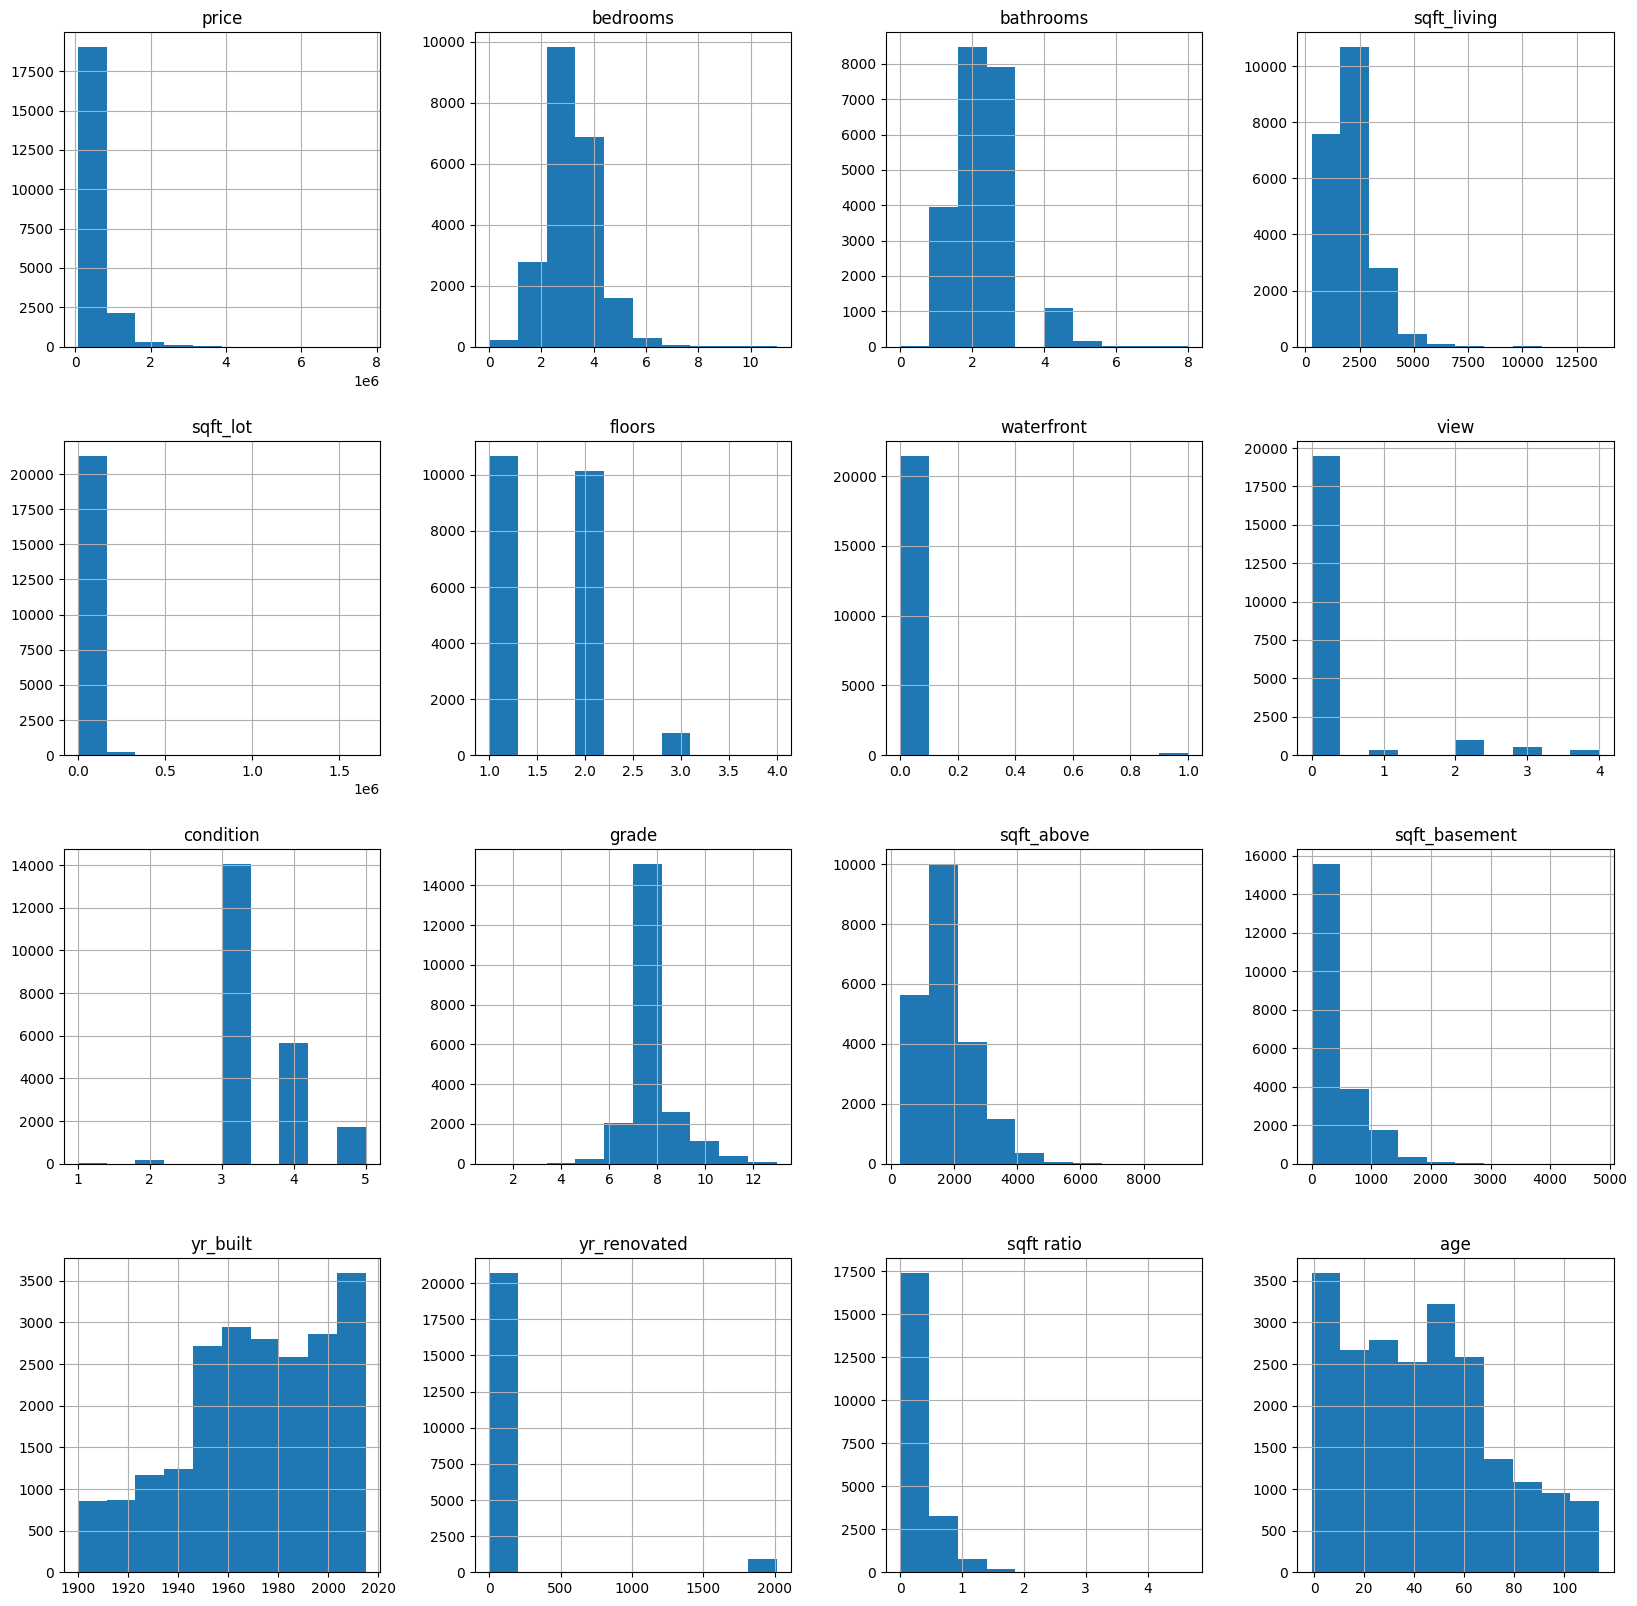

In [51]:
df.hist(figsize=(20,20))

In [52]:
df['price'] = np.log1p(df['price'])

In [53]:
df.condition.unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [54]:
df.bedrooms.unique()

array([ 2,  3,  4,  5,  6,  7,  1,  9,  8,  0, 10, 11], dtype=int64)

In [55]:
df['grade'] = np.log1p(df['grade'])

In [56]:
df.waterfront.unique()

array([0, 1], dtype=int64)

In [57]:
df['sqft_living'] = np.log1p(df['sqft_living'])

In [58]:
df['sqft_lot'] = np.log1p(df['sqft_lot'])

In [59]:
skewness = df.skew()
skewness

price             0.428152
bedrooms          0.518469
bathrooms         0.276465
sqft_living      -0.034777
sqft_lot          0.962834
floors            0.451610
waterfront       11.384839
view              3.395652
condition         1.032873
grade             0.200972
sqft_above        1.446622
sqft_basement     1.578053
yr_built         -0.469905
yr_renovated      4.549373
sqft ratio        2.375495
age               0.469905
dtype: float64

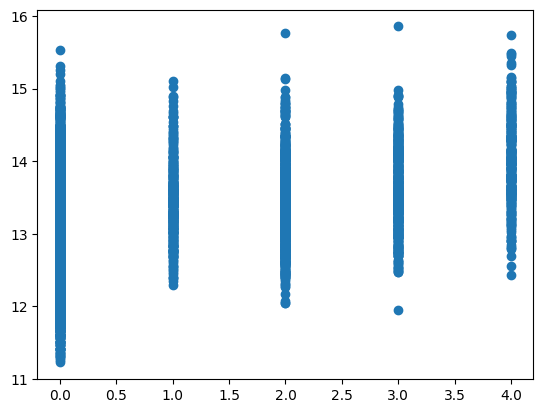

In [60]:
plt.scatter(df.view,df.price)

In [61]:
df['sqft_above'] = np.log1p(df['sqft_above'])

In [62]:
df['sqft_basement'] = np.log1p(df['sqft_basement'])

In [63]:
df['sqft_living'] = np.log1p(df['sqft_living'])

In [64]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [65]:
(df.yr_renovated == 0).value_counts()

yr_renovated
True     20698
False      914
Name: count, dtype: int64

In [66]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft ratio,age
12496,12.994532,2,1.0,2.039382,8.486940,1.0,0,0,4,2.079442,6.685861,0.0,1944,0,0.164948,70
15127,12.639480,2,1.0,2.047230,8.728264,1.0,0,0,4,2.079442,6.746412,0.0,1950,0,0.137674,64
1393,13.102163,2,1.0,2.051692,8.761080,1.0,0,0,3,2.079442,6.781058,0.0,1938,1,0.137931,76
5002,12.807655,3,1.0,2.078798,8.769663,1.0,0,0,4,2.079442,6.994850,0.0,1955,0,0.169386,59
16316,12.660331,3,1.0,2.086546,9.124891,1.0,0,0,3,2.079442,7.057037,0.0,1968,0,0.126362,46


In [67]:
df.drop('yr_built',axis=1,inplace=True)

In [68]:
columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'sqft ratio',
 'age']

In [69]:
df['price'].min()

11.225256725762893

In [70]:
for x in columns:
    df[x] = (df[x] - df[x].min()) / (df[x].max() - df[x].min())

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft ratio,age
12496,0.382011,0.181818,0.125,0.310785,0.276776,0.0,0.0,0.0,0.75,0.712414,0.291268,0.0,0.0,0.035317,0.617391
15127,0.305351,0.181818,0.125,0.328050,0.306712,0.0,0.0,0.0,0.75,0.712414,0.308686,0.0,0.0,0.029456,0.565217
1393,0.405250,0.181818,0.125,0.337867,0.310783,0.0,0.0,0.0,0.50,0.712414,0.318652,0.0,1.0,0.029511,0.669565
5002,0.341662,0.272727,0.125,0.397500,0.311847,0.0,0.0,0.0,0.75,0.712414,0.380152,0.0,0.0,0.036271,0.521739
16316,0.309853,0.272727,0.125,0.414546,0.355913,0.0,0.0,0.0,0.50,0.712414,0.398041,0.0,0.0,0.027025,0.408696


In [71]:
df.shape

(21612, 15)

In [72]:
df.floors.unique()

array([0.        , 0.66666667, 0.33333333, 1.        ])

In [73]:
df.to_csv('output_houseprice.csv',index=False)

In [74]:
y_df = df['price']
y_df

12496    0.382011
15127    0.305351
1393     0.405250
5002     0.341662
16316    0.309853
           ...   
20472    0.400505
6197     0.673206
5637     0.386864
13053    0.384693
16594    0.617575
Name: price, Length: 21612, dtype: float64

In [75]:
x_df = df.drop('price',axis=1)
x_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft ratio,age
12496,0.181818,0.125,0.310785,0.276776,0.000000,0.0,0.0,0.75,0.712414,0.291268,0.000000,0.0,0.035317,0.617391
15127,0.181818,0.125,0.328050,0.306712,0.000000,0.0,0.0,0.75,0.712414,0.308686,0.000000,0.0,0.029456,0.565217
1393,0.181818,0.125,0.337867,0.310783,0.000000,0.0,0.0,0.50,0.712414,0.318652,0.000000,1.0,0.029511,0.669565
5002,0.272727,0.125,0.397500,0.311847,0.000000,0.0,0.0,0.75,0.712414,0.380152,0.000000,0.0,0.036271,0.521739
16316,0.272727,0.125,0.414546,0.355913,0.000000,0.0,0.0,0.50,0.712414,0.398041,0.000000,0.0,0.027025,0.408696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20472,0.454545,0.375,0.677119,0.310607,0.333333,0.0,0.0,0.50,0.827087,0.691841,0.000000,0.0,0.108586,0.008696
6197,0.454545,0.375,0.684291,0.289038,0.333333,0.0,0.0,0.50,0.827087,0.700368,0.000000,0.0,0.133130,0.095652
5637,0.454545,0.250,0.541134,0.328236,0.333333,0.0,0.0,0.50,0.712414,0.535310,0.000000,0.0,0.054590,0.478261
13053,0.181818,0.250,0.463353,0.316296,0.000000,0.0,0.0,0.50,0.643793,0.261000,0.767477,0.0,0.044654,0.643478


In [76]:
x = torch.tensor(x_df.values, dtype=torch.float32)
y = torch.tensor(y_df.values, dtype=torch.float32)

In [77]:
x.dim(),y.dim()

(2, 1)

In [78]:
x.shape,y.shape

(torch.Size([21612, 14]), torch.Size([21612]))

In [79]:
y = y.unsqueeze(1)

In [80]:
y

tensor([[0.3820],
        [0.3054],
        [0.4053],
        ...,
        [0.3869],
        [0.3847],
        [0.6176]])

In [81]:
y.dtype,x.dtype

(torch.float32, torch.float32)

In [82]:
train_split = int(0.8 * len(x))
xtrain,ytrain = x[:train_split],y[:train_split]
xtest,ytest = x[train_split:],y[train_split:]

In [83]:
x.shape,y.shape,xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

(torch.Size([21612, 14]),
 torch.Size([21612, 1]),
 torch.Size([17289, 14]),
 torch.Size([17289, 1]),
 torch.Size([4323, 14]),
 torch.Size([4323, 1]))

In [84]:
class HOUSEPRICEMODEl(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(
            in_features=14,
            out_features=32
        )
        self.linear_layer2 = nn.Linear(
            in_features=32,
            out_features= 1
        )
        self.relu = nn.ReLU()
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer2( self.relu(self.linear_layer1(x)))
        

In [85]:
torch.manual_seed(42)
model = HOUSEPRICEMODEl()
model,model.state_dict()

(HOUSEPRICEMODEl(
   (linear_layer1): Linear(in_features=14, out_features=32, bias=True)
   (linear_layer2): Linear(in_features=32, out_features=1, bias=True)
   (relu): ReLU()
 ),
 OrderedDict([('linear_layer1.weight',
               tensor([[ 0.2043,  0.2218, -0.0626,  0.2455, -0.0586,  0.0539, -0.1301,  0.1570,
                         0.2356, -0.1961,  0.2323,  0.0500,  0.1975,  0.0362],
                       [ 0.1289, -0.0377,  0.2060,  0.0395, -0.1248,  0.0681, -0.1231, -0.0313,
                        -0.1086,  0.1773, -0.2110, -0.1232, -0.0755, -0.1607],
                       [ 0.0252, -0.2640,  0.2414, -0.2270,  0.2063,  0.0445, -0.0868,  0.1652,
                         0.0417,  0.2159,  0.0292, -0.0843,  0.0718, -0.0725],
                       [ 0.1125,  0.2386,  0.1545, -0.1168,  0.1543,  0.0478,  0.1357, -0.1629,
                        -0.2646, -0.1033, -0.2050,  0.2193,  0.0770,  0.1107],
                       [ 0.0845, -0.0046,  0.2092, -0.1899,  0.0168, -0.1824,  0

In [86]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [87]:
loss_fn = nn.MSELoss()

# Create optimizer
optimizer = torch.optim.Adam(params=model.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [88]:
epochs = 1000
for epoch in range(epochs):
    ### Training
    model.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model(xtrain)

    # 2. Calculate loss
    loss = loss_fn(y_pred, ytrain)
    train_acc = accuracy_fn(y_true=ytrain,y_pred=y_pred)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model(xtest)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, ytest)
        test_acc = accuracy_fn(y_true=ytest,y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss} | train_acc:{train_acc} | test_acc:{test_acc}")

Epoch: 0 | Train loss: 0.093115895986557 | Test loss: 0.04071347042918205 | train_acc:0.0 | test_acc:0.0
Epoch: 100 | Train loss: 0.005740403197705746 | Test loss: 0.0062078810296952724 | train_acc:0.0 | test_acc:0.0
Epoch: 200 | Train loss: 0.0046210987493395805 | Test loss: 0.005133765283972025 | train_acc:0.0 | test_acc:0.0
Epoch: 300 | Train loss: 0.004401097539812326 | Test loss: 0.005148483440279961 | train_acc:0.0 | test_acc:0.0
Epoch: 400 | Train loss: 0.0043588499538600445 | Test loss: 0.004893593490123749 | train_acc:0.0 | test_acc:0.0
Epoch: 500 | Train loss: 0.0043245768174529076 | Test loss: 0.004891288001090288 | train_acc:0.0 | test_acc:0.0
Epoch: 600 | Train loss: 0.0042793238535523415 | Test loss: 0.004832574166357517 | train_acc:0.0 | test_acc:0.0
Epoch: 700 | Train loss: 0.004235123284161091 | Test loss: 0.004783596843481064 | train_acc:0.0 | test_acc:0.0
Epoch: 800 | Train loss: 0.004171011038124561 | Test loss: 0.004723577760159969 | train_acc:0.0 | test_acc:0.0
Ep

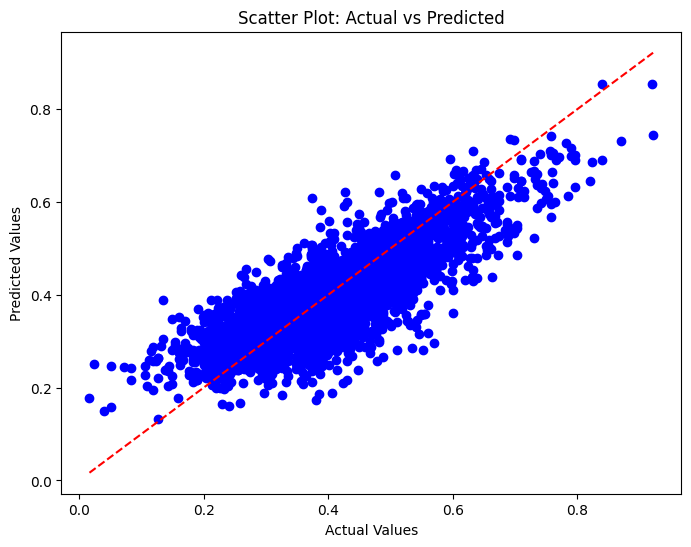

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, test_pred, color='blue')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted')
plt.show()


In [90]:
with torch.inference_mode():
    prediction = model(xtest)
print(prediction.squeeze().unsqueeze(1))

tensor([[0.3070],
        [0.3019],
        [0.2996],
        ...,
        [0.3424],
        [0.3048],
        [0.5670]])


In [91]:
prediction = prediction.numpy()
prediction

array([[0.30697343],
       [0.3018899 ],
       [0.299605  ],
       ...,
       [0.3423682 ],
       [0.3047795 ],
       [0.56704944]], dtype=float32)

In [92]:
columns = ['output']
new_df = pd.DataFrame(prediction,columns=columns)

In [93]:
new_df

,output
0,0.306973
1,0.301890
2,0.299605
3,0.241190
4,0.257171
...,...
4318,0.470870
4319,0.484657
4320,0.342368
4321,0.304779


In [94]:
#x = (df[x] - df[x].min()) / (df[x].max() - df[x].min())
#x*y+sd.min


df['output'] = df['output'] * ()



KeyError: 'output'